# **Experiment 2: KNN**

__Step__:
1. Load datasets and create functions
2. Data Splitting
3. Train KNN models using Euclidean distance and different n_neighbors
4. Train KNN models using Manhattan distance and different n_neighbors
5. Assess the best KNN model on testing set

## **1. Load datasets and create functions** 

**[1.1]** Import packages

In [1]:
import pandas as pd
import math 
import numpy as np
from itertools import repeat

# train test split
from sklearn.model_selection import train_test_split

# performance metrics
from sklearn.metrics import fbeta_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# visualization 
import matplotlib.pyplot as plt
import altair as alt
alt.data_transformers.disable_max_rows()

from scipy.stats import randint

# classifier
from sklearn.neighbors import KNeighborsClassifier

**[1.2]** Load the training dataset into dataframe called df_data

In [2]:
df_data = pd.read_csv('./repurchase_data-prepared.csv')

**[1.3]** Load the training dataset into dataframe called df_test

In [3]:
df_test = pd.read_csv('./repurchase_test-prepared.csv')

**[1.4]** Create a function to tune p and n_neighbors and return train/test results

In [4]:
def distance_n_neighbors_tuning(p, n_neighbors_list):
    """
    Parameters:
        p (int): Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. 
        n_neighbors_list: list of n_neighbors
    Return:
        A Dataframe that contains 4 columns:
        - n_neighbors: values of n_neighbors
        - recall_score: recall on a given set.
        - dataset: the type of dataset on which recall_score is calculated. Either train or test.
        - overfitting: the difference between train_score and test_score 
    """
    recall_scores = []
    n_p_values = len(n_neighbors_list)
    dataset = ['train', 'validation'] * n_p_values
    overfitting = []
    
    for v in n_neighbors_list:
        knn_classifier = KNeighborsClassifier(p = p, n_neighbors = v)
        knn_classifier.fit(X_train, y_train)
        y_train_preds = knn_classifier.predict(X_train)
        y_val_preds = knn_classifier.predict(X_val)
        
        recall_train = recall_score(y_train, y_train_preds)
        recall_val = recall_score(y_val, y_val_preds)
        recall_scores.append(recall_train)
        recall_scores.append(recall_val)
        overfitting.extend(repeat(recall_train - recall_val,2))
    return pd.DataFrame({'n_neighbors': sorted(n_neighbors_list * 2), 'recall_score': recall_scores, 'dataset': dataset, 'overfitting': overfitting})

**[1.5]** Create a function to plot results of results of tuned models

In [5]:
def compare_train_test(tuning):
    return alt.Chart(tuning).mark_line(point=True).encode(
        x='n_neighbors',
        y='recall_score',
        color='dataset',
    )

## 2. Data Splitting

**[2.1]** Extract target values and independent values from df_data

In [6]:
y_data = df_data.pop('Target')
X_data = df_data

**[2.2]** Extract target values and independent values from df_test

In [7]:
y_test = df_test.pop('Target')
X_test = df_test

**[2.3]** Split the data randomly into 2 different sets: training (80%) and validation (20%) with random_state=42 and stratify=y_data

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

**[2.4]** Print the frequencies of each value of the target variable from the validation set

In [9]:
y_val.value_counts(normalize=True)

0    0.973208
1    0.026792
Name: Target, dtype: float64

**[2.5]** Print the frequencies of each value of the target variable from the training set

In [10]:
y_train.value_counts(normalize=True)

0    0.973184
1    0.026816
Name: Target, dtype: float64

## 3. Train KNN models using Euclidean distance and different n_neighbors

**[3.1]** Train KNN models using Euclidean distance and n_neighbors = [3, 5, 15, 25, 35] and save the results

In [11]:
knn_euc = distance_n_neighbors_tuning(2, [3, 5, 15, 25, 35])

/Users/nguyenthao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nguyenthao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

In [12]:
knn_euc

,n_neighbors,recall_score,dataset,overfitting
0,3,0.690772,train,0.140150
1,3,0.550622,validation,0.140150
2,5,0.595830,train,0.075403
3,5,0.520426,validation,0.075403
4,15,0.433452,train,0.053345
5,15,0.380107,validation,0.053345
6,25,0.361136,train,0.023658
7,25,0.337478,validation,0.023658
8,35,0.310115,train,0.015266
9,35,0.294849,validation,0.015266


**[3.2]** Plot results to compare

In [13]:
compare_train_test(knn_euc)

alt.Chart(...)

## 4. Train KNN model using manhattan distance and different neighbors

**[4.1]** Train KNN models using Manhattan distance and n_neighbors = [3, 5, 15, 25, 35] and save the results

In [14]:
knn_man = distance_n_neighbors_tuning(1, [3, 5, 15, 25, 35])

/Users/nguyenthao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nguyenthao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

**[4.2]** Plot results to compare

In [15]:
compare_train_test(knn_man)

alt.Chart(...)

## 5. Assess the best KNN model on testing set

**[5.1]** Fitt the best KNN model

In [16]:
knn_best = KNeighborsClassifier(p = 2, n_neighbors = 5).fit(X_train, y_train)

**[5.2]** Use the best KNN to predict X_test and save to y_test_preds

In [17]:
y_test_preds = knn_best.predict(X_test)

/Users/nguyenthao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


**[5.3]** Print f2 score, precision, and recall on testing set

In [18]:
precision = precision_score(y_test, y_test_preds)
print('Precision: ', precision)
recall= recall_score(y_test, y_test_preds)
print('Recall: ', recall)
f2 = fbeta_score(y_test, y_test_preds, beta = 2)
print('F2: ', f2)

Precision:  0.8986666666666666
Recall:  0.4786931818181818
F2:  0.5280476339705421


**[5.4]** Confusion matrix on testing set

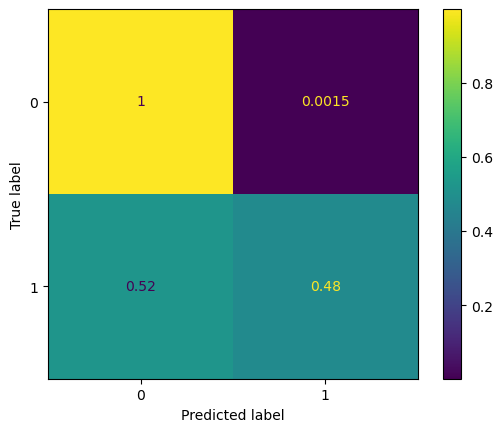

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_preds, normalize = 'true')